In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv('training_observables.csv', header=None)

In [ ]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,0,0.0,0.493280,119.32780,0.026617,0.019539,0.001285,0.004125,-0.114632,-0.192545,...,0.001793,0.003997,0.008152,0.015164,0.025790,0.040464,0.059261,0.081969,0.108310,0.138916
1,1,0.0,0.499796,140.66150,0.027218,0.015303,0.017385,0.001732,1.389377,0.282950,...,0.000811,0.001750,0.003415,0.006048,0.009945,0.015720,0.024593,0.038424,0.059534,0.090801
2,2,0.0,0.503392,152.76870,0.011552,0.016412,0.004306,0.007357,-0.133998,0.223442,...,0.003183,0.006916,0.013742,0.025196,0.042973,0.068877,0.104854,0.153033,0.215902,0.298440
3,3,0.0,0.488244,123.84110,0.016648,0.007232,0.004221,0.001482,1.066655,0.425053,...,0.000763,0.001691,0.003347,0.005789,0.008923,0.013181,0.020897,0.036646,0.066004,0.117576
4,4,0.0,0.496821,130.78380,0.029870,0.034460,0.016352,0.001592,0.849569,-0.411059,...,0.000919,0.002004,0.003871,0.006358,0.008433,0.007623,0.003397,0.026416,0.078568,0.177591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22570,22570,1.0,0.495708,43.28272,0.031320,0.010866,0.007185,0.000848,-0.414526,-0.690625,...,0.000392,0.000845,0.001672,0.003088,0.005341,0.008532,0.012373,0.016067,0.018169,0.015897
22571,22571,1.0,0.536097,35.77644,0.089789,0.015850,0.006881,0.005601,-0.028845,0.934089,...,0.001865,0.003920,0.007764,0.015250,0.029065,0.051837,0.085413,0.130882,0.189289,0.264222
22572,22572,1.0,0.516989,40.66633,0.056547,0.031709,0.012869,0.007707,0.561080,0.025548,...,0.003741,0.007919,0.014907,0.025046,0.037916,0.052361,0.066622,0.078427,0.085027,0.082829
22573,22573,1.0,0.514398,48.36263,0.059926,0.013307,0.006346,0.004572,0.499208,-1.016149,...,0.002169,0.004623,0.008857,0.015174,0.023454,0.033371,0.044792,0.058167,0.075026,0.098845


In [ ]:
header_list = {
    0 : 'number',
    1 : 'eos_type',
    2 :	'mean_pt',
    3 :	'dndy',
    4 :	'v2',
    5 :	'v3',
    6 :	'v4',
    7 : 'v5',
    8 :	'psi2',
    9 :	'psi3',
    10 : 'psi4',
    11 :	'psi5',
    12 :'ptspec_bin0',
    13 : 'ptspec_bin',
    14 : 'ptspec_bin2',
    15 :	'ptspec_bin3',
    16 : 'ptspec_bin4',
    17 :	'ptspec_bin5',
    18 :	'ptspec_bin6',
    19 :	'ptspec_bin7',
    20 :	'ptspec_bin8',
    21 : 	'ptspec_bin9',
    22 :	'ptspec_bin10',
    23 :	'ptspec_bin11',
    24 :	'ptspec_bin12',
    25 :	'ptspec_bin13',
    26 :	'ptspec_bin14',
    27 :	'v2_ptbin0',
    28 :	'v2_ptbin1',
    29 :	'v2_ptbin2',
    30 :	'v2_ptbin3',
    31 :	'v2_ptbin4',
    32 :	'v2_ptbin5',
    33 :	'v2_ptbin6',
    34 :	'v2_ptbin7',
    35 :	'v2_ptbin8',
    36 :	'v2_ptbin9',
    37 :	'v2_ptbin10',
    38 :	'v2_ptbin11',
    39 :	'v2_ptbin12',
    40 :	'v2_ptbin13',
    41 :	'v2_ptbin14',
    42 :	'v3_ptbin0',
    43 :	'v3_ptbin1',
    44 :	'v3_ptbin2',
    45 :	'v3_ptbin3',
    46 :	'v3_ptbin4',
    47 :	'v3_ptbin5',
    48 :	'v3_ptbin6',
    49 :	'v3_ptbin7',
    50 : 'v3_ptbin8',
    51 : 'v3_ptbin9',
    52 : 'v3_ptbin10',
    53 : 'v3_ptbin11',
    54 : 'v3_ptbin12',
    55 : 'v3_ptbin13',
    56 : 'v3_ptbin14',
    57 : 'v4_ptbin0',
    58 : 'v4_ptbin1',
    59 : 'v4_ptbin2',
    60 : 'v4_ptbin3',
    61 : 'v4_ptbin4',
    62 : 'v4_ptbin5',
    63 : 'v4_ptbin6',
    64 : 'v4_ptbin7',
    65 : 'v4_ptbin8',
    66 : 'v4_ptbin9',
    67 : 'v4_ptbin10',
    68 : 'v4_ptbin11',
    69 : 'v4_ptbin12',
    70 : 'v4_ptbin13',
    71 : 'v4_ptbin14',
    72 : 'v5_ptbin0',
    73 : 'v5_ptbin1',
    74 : 'v5_ptbin2',
    75 : 'v5_ptbin3',
    76 : 'v5_ptbin4',
    77 : 'v5_ptbin5',
    78 : 'v5_ptbin6',
    79 : 'v5_ptbin7',
    80 : 'v5_ptbin8',
    81 : 'v5_ptbin9',
    82 : 'v5_ptbin10',
    83 : 'v5_ptbin11',
    84 : 'v5_ptbin12',
    85 : 'v5_ptbin13',
    86 : 'v5_ptbin14'
}


In [6]:
dataset = dataset.rename(columns=header_list)
dataset.head(5)

,number,eos_type,mean_pt,dndy,v2,v3,v4,v5,psi2,psi3,...,v5_ptbin5,v5_ptbin6,v5_ptbin7,v5_ptbin8,v5_ptbin9,v5_ptbin10,v5_ptbin11,v5_ptbin12,v5_ptbin13,v5_ptbin14
0,0,0.0,0.493280,119.3278,0.026617,0.019539,0.001285,0.004125,-0.114632,-0.192545,...,0.001793,0.003997,0.008152,0.015164,0.025790,0.040464,0.059261,0.081969,0.108310,0.138916
1,1,0.0,0.499796,140.6615,0.027218,0.015303,0.017385,0.001732,1.389377,0.282950,...,0.000811,0.001750,0.003415,0.006048,0.009945,0.015720,0.024593,0.038424,0.059534,0.090801
2,2,0.0,0.503392,152.7687,0.011552,0.016412,0.004306,0.007357,-0.133998,0.223442,...,0.003183,0.006916,0.013742,0.025196,0.042973,0.068877,0.104854,0.153033,0.215902,0.298440
3,3,0.0,0.488244,123.8411,0.016648,0.007232,0.004221,0.001482,1.066655,0.425053,...,0.000763,0.001691,0.003347,0.005789,0.008923,0.013181,0.020897,0.036646,0.066004,0.117576
4,4,0.0,0.496821,130.7838,0.029870,0.034460,0.016352,0.001592,0.849569,-0.411059,...,0.000919,0.002004,0.003871,0.006358,0.008433,0.007623,0.003397,0.026416,0.078568,0.177591


In [7]:
dataset = dataset.drop(['number'], axis = 1)
dataset

,eos_type,mean_pt,dndy,v2,v3,v4,v5,psi2,psi3,psi4,...,v5_ptbin5,v5_ptbin6,v5_ptbin7,v5_ptbin8,v5_ptbin9,v5_ptbin10,v5_ptbin11,v5_ptbin12,v5_ptbin13,v5_ptbin14
0,0.0,0.493280,119.32780,0.026617,0.019539,0.001285,0.004125,-0.114632,-0.192545,0.604534,...,0.001793,0.003997,0.008152,0.015164,0.025790,0.040464,0.059261,0.081969,0.108310,0.138916
1,0.0,0.499796,140.66150,0.027218,0.015303,0.017385,0.001732,1.389377,0.282950,0.155580,...,0.000811,0.001750,0.003415,0.006048,0.009945,0.015720,0.024593,0.038424,0.059534,0.090801
2,0.0,0.503392,152.76870,0.011552,0.016412,0.004306,0.007357,-0.133998,0.223442,-0.593591,...,0.003183,0.006916,0.013742,0.025196,0.042973,0.068877,0.104854,0.153033,0.215902,0.298440
3,0.0,0.488244,123.84110,0.016648,0.007232,0.004221,0.001482,1.066655,0.425053,-0.017385,...,0.000763,0.001691,0.003347,0.005789,0.008923,0.013181,0.020897,0.036646,0.066004,0.117576
4,0.0,0.496821,130.78380,0.029870,0.034460,0.016352,0.001592,0.849569,-0.411059,0.742171,...,0.000919,0.002004,0.003871,0.006358,0.008433,0.007623,0.003397,0.026416,0.078568,0.177591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22570,1.0,0.495708,43.28272,0.031320,0.010866,0.007185,0.000848,-0.414526,-0.690625,0.623115,...,0.000392,0.000845,0.001672,0.003088,0.005341,0.008532,0.012373,0.016067,0.018169,0.015897
22571,1.0,0.536097,35.77644,0.089789,0.015850,0.006881,0.005601,-0.028845,0.934089,0.126117,...,0.001865,0.003920,0.007764,0.015250,0.029065,0.051837,0.085413,0.130882,0.189289,0.264222
22572,1.0,0.516989,40.66633,0.056547,0.031709,0.012869,0.007707,0.561080,0.025548,0.430158,...,0.003741,0.007919,0.014907,0.025046,0.037916,0.052361,0.066622,0.078427,0.085027,0.082829
22573,1.0,0.514398,48.36263,0.059926,0.013307,0.006346,0.004572,0.499208,-1.016149,0.443735,...,0.002169,0.004623,0.008857,0.015174,0.023454,0.033371,0.044792,0.058167,0.075026,0.098845


In [ ]:
important_features = [
    
    'eos_type',
	'v2',
	'v3',
 'psi2'
	   
]

important_features_id = np.array([
                         0,
                         4,
                         5,
                         8
                         
])

In [ ]:

dataset = dataset.to_numpy()
Y = dataset[:, 0]
Y = np.array(Y, dtype=int)
X = dataset[:, 1:]

# Sanity check
print(X.shape, Y.shape)

In [ ]:


x_0 = X[Y == 0, :]
x_1 = X[Y == 1, :]
y_0 = Y[Y==0]
y_1 = Y[Y==1]


print(x_0.shape, y_0.shape)
print(x_1.shape, y_1.shape)

(13434, 85) (13434,)
(9141, 85) (9141,)


In [ ]:


x_train_0, x_test_0, y_train_0, y_test_0 = train_test_split(x_0, y_0, test_size=0.5, random_state=2021)
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=0.5, random_state=2021)

In [ ]:
num_sample = 2000 
X_train = np.concatenate((x_train_0[:num_sample, :], x_train_1[:num_sample, :]), axis=0)
Y_train = np.concatenate((y_train_0[:num_sample], y_train_1[:num_sample]), axis=0)


X_test = np.concatenate((x_test_0[:num_sample, :], x_test_1[:num_sample, :]), axis=0)
Y_test = np.concatenate((y_test_0[:num_sample], y_test_1[:num_sample]), axis=0)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(4000, 85) (4000,)
(4000, 85) (4000,)


In [ ]:
np.savetxt('./QCD Dataset/X_train_4000.txt', X_train)
np.savetxt('./QCD Dataset/X_test_4000.txt', X_test)
np.savetxt('./QCD Dataset/Y_train_4000.txt', Y_train)
np.savetxt('./QCD Dataset/Y_test_4000.txt', Y_test)

In [ ]:
num_sample = 4000

X_train = np.loadtxt('./QCD Dataset/X_train_' + str(num_sample) + '.txt')
Y_train = np.loadtxt('./QCD Dataset/Y_train_' + str(num_sample) + '.txt')

X_test = np.loadtxt('./QCD Dataset/X_test_' + str(num_sample) + '.txt')
Y_test = np.loadtxt('./QCD Dataset/Y_test_' + str(num_sample) + '.txt')

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(4000, 85) (4000,)
(4000, 85) (4000,)


In [ ]:
X_train = X_train[:, important_features_id[:3]]
X_test = X_test[:, important_features_id[:3]]

X_train.shape, X_test.shape

((4000, 3), (4000, 3))

In [17]:
X_train

array([[0.5727371 , 0.01961521, 0.01268726],
       [0.5031572 , 0.01139411, 0.00381489],
       [0.493949  , 0.00356587, 0.00591594],
       ...,
       [0.4378398 , 0.01194924, 0.00095084],
       [0.4434155 , 0.00266166, 0.00173735],
       [0.4957438 , 0.01178781, 0.00435343]])

In [18]:
X_test

array([[0.5949019 , 0.01120026, 0.0141949 ],
       [0.566241  , 0.0397017 , 0.0133887 ],
       [0.4653798 , 0.01649949, 0.00153883],
       ...,
       [0.5077894 , 0.00496598, 0.00181929],
       [0.5087496 , 0.00478042, 0.00345181],
       [0.5005321 , 0.00357258, 0.00427089]])

In [19]:
Y_train

array([0., 0., 0., ..., 1., 1., 1.])

In [20]:
Y_test

array([0., 0., 0., ..., 1., 1., 1.])

In [21]:
import numpy as np
import torch
from torch.nn.functional import relu

from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pennylane as qml
from pennylane.templates import AngleEmbedding, StronglyEntanglingLayers
from pennylane.operation import Tensor

import matplotlib.pyplot as plt

np.random.seed(42)

In [22]:
n_qubits = len(X_train[0])
n_qubits

3

In [23]:
dev_kernel = qml.device("default.qubit", wires=n_qubits)

projector = np.zeros((2**n_qubits, 2**n_qubits))
projector[0, 0] = 1

@qml.qnode(dev_kernel)
def kernel(x1, x2):
    """The quantum kernel."""
    AngleEmbedding(x1, wires=range(n_qubits))
    qml.adjoint(AngleEmbedding)(x2, wires=range(n_qubits))
    return qml.expval(qml.Hermitian(projector, wires=range(n_qubits)))

In [24]:
kernel(X_train[0], X_train[0])

tensor(1., requires_grad=True)

In [25]:
def kernel_matrix(A, B):
    """Compute the matrix whose entries are the kernel
       evaluated on pairwise data from sets A and B."""
    return np.array([[kernel(a, b) for b in B] for a in A])

In [26]:
svm = SVC(kernel=kernel_matrix).fit(X_train, Y_train)

In [ ]:
predictions = svm.predict(X_test)
accuracy_score(predictions, Y_test)

0.8275

In [ ]:
dev_kernel.num_executions

320001

In [ ]:
def circuit_evals_kernel(n_data, split):
    

    M = int(np.ceil(split * n_data))
    Mpred = n_data - M

    n_training = M * M
    n_prediction = M * Mpred

    return n_training + n_prediction

In [ ]:
circuit_evals_kernel(n_data=len(X), split=len(X_train) /(len(X_train) + len(X_test)))

254826600

In [ ]:
dev_var = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev_var, interface="torch", diff_method="parameter-shift")
def quantum_model(x, params):
    """A variational quantum model."""

    # embedding
    AngleEmbedding(x, wires=range(n_qubits))

    # trainable measurement
    StronglyEntanglingLayers(params, wires=range(n_qubits))
    return qml.expval(qml.PauliZ(0))

def quantum_model_plus_bias(x, params, bias):
    """Adding a bias."""
    return quantum_model(x, params) + bias

def hinge_loss(predictions, targets):
    """Implements the hinge loss."""
    all_ones = torch.ones_like(targets)
    hinge_loss = all_ones - predictions * targets
    # trick: since the max(0,x) function is not differentiable,
    # use the mathematically equivalent relu instead
    hinge_loss = relu(hinge_loss)
    return hinge_loss

In [ ]:
def quantum_model_train(n_layers, steps, batch_size):
    

    params = np.random.random((n_layers, n_qubits, 3))
    params_torch = torch.tensor(params, requires_grad=True)
    bias_torch = torch.tensor(0.0)

    opt = torch.optim.Adam([params_torch, bias_torch], lr=0.1)

    loss_history = []
    for i in range(steps):

        batch_ids = np.random.choice(len(X_train), batch_size)

        X_batch = X_train[batch_ids]
        y_batch = Y_train[batch_ids]

        X_batch_torch = torch.tensor(X_batch, requires_grad=False)
        y_batch_torch = torch.tensor(y_batch, requires_grad=False)

        def closure():
            opt.zero_grad()
            preds = torch.stack(
                [quantum_model_plus_bias(x, params_torch, bias_torch) for x in X_batch_torch]
            )
            loss = torch.mean(hinge_loss(preds, y_batch_torch))

            # bookkeeping
            current_loss = loss.detach().numpy().item()
            loss_history.append(current_loss)
            if i % 10 == 0:
                print("step", i, ", loss", current_loss)

            loss.backward()
            return loss

        opt.step(closure)

    return params_torch, bias_torch, loss_history


def quantum_model_predict(X_pred, trained_params, trained_bias):
    """Predict using the quantum model defined above."""

    p = []
    for x in X_pred:

        x_torch = torch.tensor(x)
        pred_torch = quantum_model_plus_bias(x_torch, trained_params, trained_bias)
        pred = pred_torch.detach().numpy().item()
        if pred > 0:
            pred = 1
        else:
            pred = -1

        p.append(pred)
    return p

step 0 , loss 0.8563191001013569
step 10 , loss 0.5615959659240116
step 20 , loss 0.45986020671957056
step 30 , loss 0.5095650636919851
step 40 , loss 0.6034720145867367
step 50 , loss 0.5017926799968434
step 60 , loss 0.2521063628336219
step 70 , loss 0.7007138524371598
step 80 , loss 0.3506985253461143
step 90 , loss 0.3508393315769453
accuracy on test set: 0.8


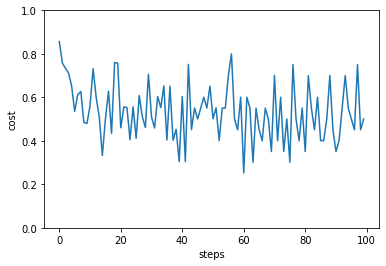

In [ ]:
n_layers = 2
batch_size = 20
steps = 100
trained_params, trained_bias, loss_history = quantum_model_train(n_layers, steps, batch_size)

pred_test = quantum_model_predict(X_test, trained_params, trained_bias)
print("accuracy on test set:", accuracy_score(pred_test, Y_test))

plt.plot(loss_history)
plt.ylim((0, 1))
plt.xlabel("steps")
plt.ylabel("cost")
plt.show()

How often was the device executed?

In [ ]:
dev_var.num_executions

76152

In [ ]:
def circuit_evals_variational(n_data, n_params, n_steps, shift_terms, split, batch_size):
    

    M = int(np.ceil(split * n_data))
    Mpred = n_data - M

    n_training = n_params * n_steps * batch_size * shift_terms
    n_prediction = Mpred

    return n_training + n_prediction

In [ ]:
circuit_evals_variational(
    n_data=len(X),
    n_params=len(trained_params.flatten()),
    n_steps=steps,
    shift_terms=2,
    split=len(X_train) /(len(X_train) + len(X_test)),
    batch_size=batch_size,
)

83287

In [ ]:
def model_evals_nn(n_data, n_params, n_steps, split, batch_size):
    """Compute how many model evaluations are needed for neural
       network training and prediction."""

    M = int(np.ceil(split * n_data))
    Mpred = n_data - M

    n_training = n_steps * batch_size
    n_prediction = Mpred

    return n_training + n_prediction

In [ ]:
model_evals_nn(
    n_data=len(X),
    n_params=len(trained_params.flatten()),
    n_steps=steps,
    split=len(X_train) /(len(X_train) + len(X_test)),
    batch_size=batch_size,
)

13287